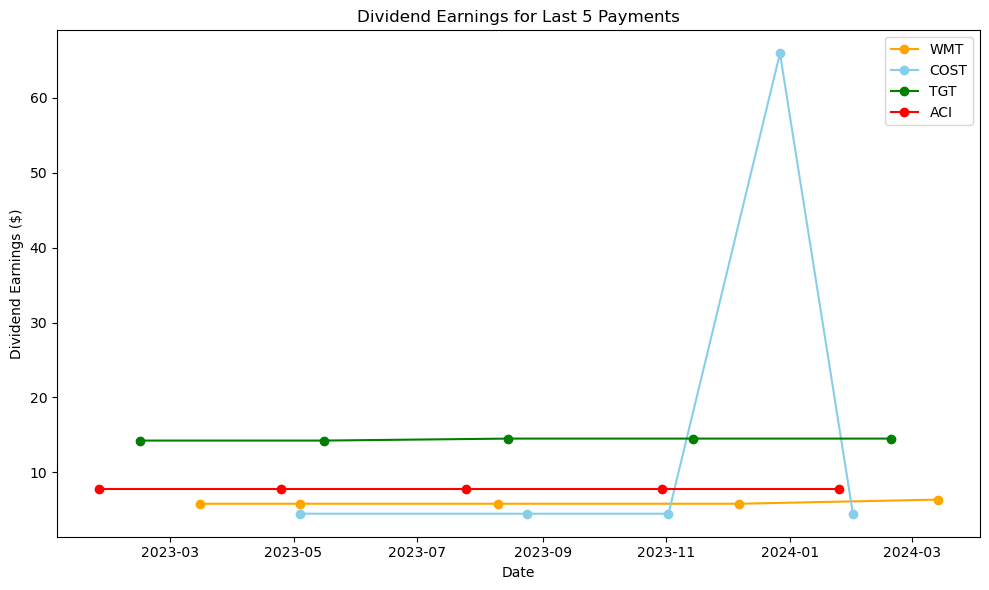

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# List of company symbols
companies = ['WMT', 'COST', 'TGT', 'ACI']

# Dictionary to store results
results = {}

# Color mapping for each company
color_map = {'WMT': 'orange', 'COST': 'skyblue', 'TGT': 'green', 'ACI': 'red'}

# Iterate over each company
for company in companies:
    # Load stock data CSV file
    stock_df = pd.read_csv(f'../data/{company}.csv')

    # Extract the opening stock price for the first day
    opening_price = stock_df.iloc[0]['Open']

    # Calculate the number of shares you could buy
    shares_to_buy = 1000 / opening_price

    # Load dividend data CSV file
    dividend_df = pd.read_csv(f'../data/{company} Dividend Data.csv')

    # Sort the dividend data by date
    dividend_df['Date'] = pd.to_datetime(dividend_df['Date'], format='%d/%m/%Y')
    dividend_df = dividend_df.sort_values(by='Date', ascending=False)

    # Calculate dividend earnings for each of the last 5 dividend payments
    dividend_earnings = []
    for index, row in dividend_df.head(5).iterrows():
        dividend_earnings.append({'Date': row['Date'], 'Amount': row['Dividends'] * shares_to_buy})

    # Store results in dictionary
    results[company] = {'Dividend Earnings': dividend_earnings}

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Dividend Earnings for Last 5 Payments')
plt.xlabel('Date')
plt.ylabel('Dividend Earnings ($)')

for company, data in results.items():
    dates = [earning['Date'] for earning in data['Dividend Earnings']]
    earnings = [earning['Amount'] for earning in data['Dividend Earnings']]
    plt.plot(dates, earnings, marker='o', linestyle='-', label=company, color=color_map[company])

plt.legend()
plt.tight_layout()

# Save the graph as a PNG file
plt.savefig('../output/dividend_earnings.png')

# Display the graph
plt.show()